<a href="https://colab.research.google.com/github/padobrik/2de-processing/blob/main/processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import torchvision
from PIL import Image
import io
from sklearn.preprocessing import normalize

In [131]:
# Show image using colab (cv2.imshow() does not work here)
def read_image(image_path: str) -> np.ndarray:
    image_src = cv2.imread(image_path)
    image_src = cv2.cvtColor(image_src, cv2.COLOR_BGR2GRAY)
    return image_src

In [191]:
def normalize(image):
  transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(
        mean=[0.5, 0.5, 0.5],
        std=[0.1, 0.1, 0.1],
    ),
])
  normalized_image = transform(image)
  return normalized_image.numpy().transpose(1, 2, 0)

In [192]:
image = Image.open('test.png')
image_np = np.asarray(image)

In [193]:
image_normalized = normalize(image_np)

In [64]:
def equalize(image_path: str, grayscale: bool = False, plot: bool = False):
  '''
  Zhopa
  '''
  image_src = read_image(image_path, grayscale=grayscale)
  if not grayscale:
    R, G, B = cv2.split(image_src)

    R_eq = cv2.equalizeHist(R)
    G_eq = cv2.equalizeHist(G)
    B_eq = cv2.equalizeHist(B)

    image_equalized = cv2.merge((R_eq, G_eq, B_eq))
    cmap_value = None

  else:
    image_equalized = cv2.equalizeHist(image_src)
    cmap_value = 'gray'
  
  if plot:
    figure = plt.figure(figsize=(10, 20))

    ax1 = figure.add_subplot(221)
    ax1.axis('off')
    ax1.title.set_text('Original')

    ax2 = figure.add_subplot(222)
    ax2.axis('off')
    ax2.title.set_text('Equalized')

    ax1.imshow(image_src, cmap=cmap_value)
    ax2.imshow(image_equalized, cmap=cmap_value)
    return True

  return image_equalized

True

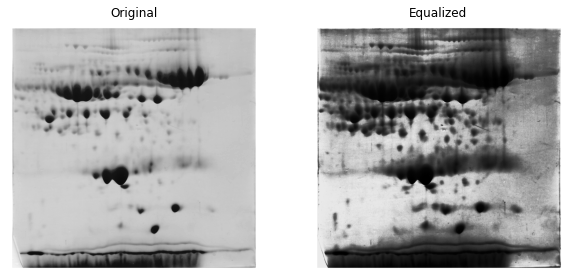

In [63]:
equalize('test.png', grayscale=True, plot=True)

In [72]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

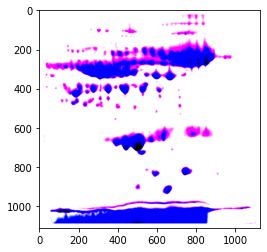

In [213]:
plt.imshow(image_normalized)

In [207]:
image_src = cv2.cvtColor(image_normalized, cv2.COLOR_BGR2GRAY)